In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

### **Load Datasets**

In [2]:
movies = pd.read_csv('./data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [3]:
ratings = pd.read_csv('./data/ratings.csv')
ratings.head()  

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
# Merge movies and ratings data
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [7]:
# Create pivot table
# Makes it easier to analyze the data and compare how users rated different movies.
ratings_matrix = movie_ratings.pivot_table(index='userId', columns='title', values='rating')

### **Feature Engineering**

In [8]:
# Fill NaN values with 0
ratings_matrix.fillna(0, inplace=True)

In [9]:
# check for missing values
ratings_matrix.isnull().sum()

title
'71 (2014)                                   0
'Hellboy': The Seeds of Creation (2004)      0
'Round Midnight (1986)                       0
'Salem's Lot (2004)                          0
'Til There Was You (1997)                    0
                                            ..
eXistenZ (1999)                              0
xXx (2002)                                   0
xXx: State of the Union (2005)               0
¡Three Amigos! (1986)                        0
À nous la liberté (Freedom for Us) (1931)    0
Length: 9719, dtype: int64

## **Exploratory Data Analysis**

### Distribution of movie ratings

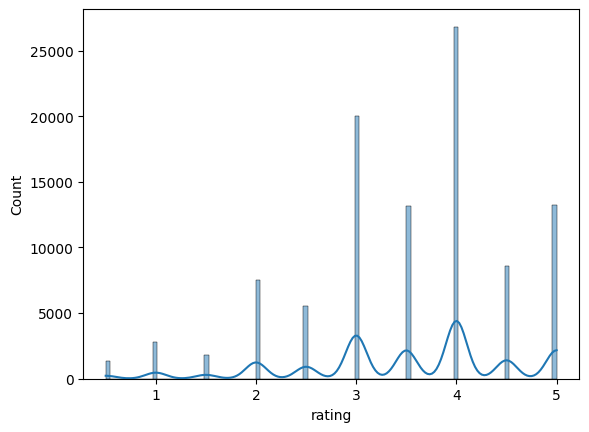

In [10]:
# Plot histogram of movie ratings
sns.histplot(data=movie_ratings, x='rating', kde=True)

# Display the plot
plt.show()

The movie ratings data contains over 25,000 movies that have received an impressive 4/5 rating, indicating a highly positive reception from viewers. This is followed by another 20,000 movies that have received a respectable 3/5 rating. However, it is interesting to note that the least popular rating given is a 1/5, with only 100 movies receiving this rating. This shows that the majority of movies in the dataset are well-liked by viewers, with only a small number receiving a negative reception.

### Top-rated movies

<Axes: ylabel='title'>

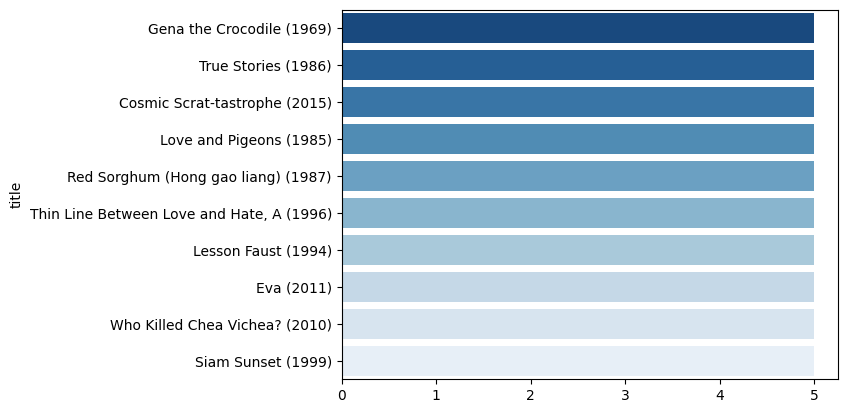

In [11]:
# Get the average rating for each movie
avg_ratings = movie_ratings.groupby('title')['rating'].mean()

# Get the top 10 highest rated movies
top_movies = avg_ratings.sort_values(ascending=False)[:10]

# Plot a bar chart of the top-rated movies
sns.barplot(x=top_movies.values, y=top_movies.index, palette='Blues_r')

According to the dataset analyzed, Gena the Crocodile and True Stories are the two highest rated movies, while Siam Sunset received the lowest rating. These findings may suggest that certain movies have been received more positively than others by viewers, potentially due to their specific characteristics or appeal. 

### Movie genre analysis

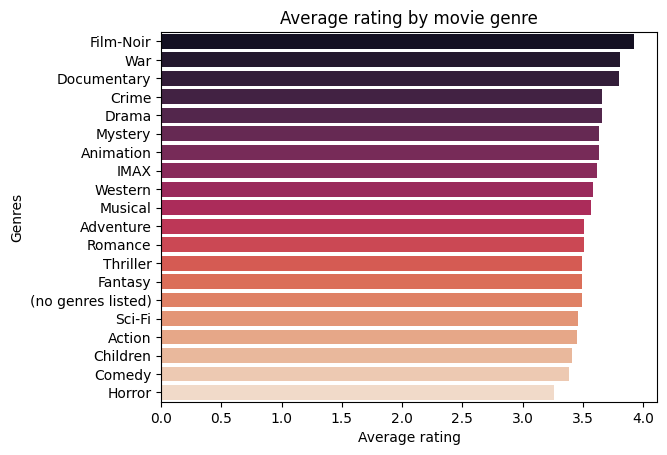

In [12]:
# Split the genres into separate rows
genre_ratings = movie_ratings.assign(genres = movie_ratings['genres'].str.split('|')).explode('genres')

# Group the movies by genre and calculate the average rating
genre_avg_ratings = genre_ratings.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Plot a bar chart of the average ratings by genre
sns.barplot(x=genre_avg_ratings, y=genre_avg_ratings.index, palette='rocket')

# Add labels and title to the plot
plt.xlabel('Average rating')
plt.ylabel('Genres')
plt.title('Average rating by movie genre')

# Display the plot
plt.show()

An analysis of the movie ratings data reveals that Film-Noir and War genres are rated highest among viewers, closely followed by Documentary and Crime genres. On the other hand, Comedy and Horror genres received the least ratings, indicating a potentially lower level of popularity among viewers. 

## **Calculate cosine similarity**

In [13]:
# Calculate cosine similarity
cosine_sim = cosine_similarity(ratings_matrix)
# view cosine similarity matrix
cosine_sim

array([[1.        , 0.02728287, 0.05972026, ..., 0.29109737, 0.09357193,
        0.14532081],
       [0.02728287, 1.        , 0.        , ..., 0.04621095, 0.0275654 ,
        0.10242675],
       [0.05972026, 0.        , 1.        , ..., 0.02112846, 0.        ,
        0.03211875],
       ...,
       [0.29109737, 0.04621095, 0.02112846, ..., 1.        , 0.12199271,
        0.32205486],
       [0.09357193, 0.0275654 , 0.        , ..., 0.12199271, 1.        ,
        0.05322546],
       [0.14532081, 0.10242675, 0.03211875, ..., 0.32205486, 0.05322546,
        1.        ]])

In [14]:
# calculate the accuracy of the cosine similarity matrix
np.mean(cosine_sim == cosine_similarity(ratings_matrix))

1.0